# Análise Exploratória de Empresas Unicórnios em 2021 com Python

Primeiramente, o que é uma empresa unicórnio? Empresas unicórnios são startups de capital fechado com valor superior a US$ 1 bilhão no mercado global, o termo é usado para representar a raridade dessas empresas.

Nesse projeto vamos trabalhar com os dados dessas empresas para gerar insights e aperfeiçoar a prática com python para EDA (exploratory data analysis).

Essa base de dados é utilizada em vários outros projetos, muitos deles guiados e que apresentam a exata mesma estrutura, caso seja do seu interesse pode ir mais a fundo no github e encontrá-los, aqui eu tento trazer uma abordagem diferente da maioria, usando algumas estruturas de código e visualizações extras. Por mais simples que seja, meu objetivo principal é alterar tudo que eu acho que seja necessário e se encaixa melhor para a análise, além de manter uma linha de raciocinio mais didática me aprofundando em alguns detalhes.

# 1. Importação de bibliotecas
---

#### Essa é talvez uma das etapas mais importantes para todo o processo das análises, com ela podemos manipular os dados, criar visualizações e muito mais de maneira simplificada. 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore') # desabilita avisos como do inplace = True

> *Dica: Não é necessário saber todas as bibliotecas que vai precisar utilizar logo no começo do projeto, por mais que seja recomendado ter um planejamento prévio, em algumas situações você dará conta que precisa de outra `lib` durante o processo.*

# 2. Exploração Inicial dos dados 
---

#### Realizamos análises iniciais das informações contidas no csv, buscando entender o que está armazenado e observar possíveis inconsistências.

In [ ]:
# carregando a base de 

data_base = pd.read_csv('Startups_in_2021_end.csv')

# verificando o tamanho da base de 

data_base.shape

(936, 8)

Com a biblioteca `pandas` atribuimos o arquivo csv á variavel `data_base` e com a função `.shape` descobrimos que essa tabela tem **936 linhas** e **8 colunas** no total.


In [ ]:
# mostrando as 5 primeiras linhas da base de dados

data_base.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


`.head` nos traz os primeiros valores dentro da tabela, com isso observamos brevemente o que é cada campo e os tipos de dados presentes no arquivo.

> *Obs: é possivel notar que um título de campo não apresenta nome, essa é nossa primeira inconsistencia.*

In [ ]:
# verificando as colunas da base de dados

data_base.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

Retornamos exatamente quais os títulos de cada coluna para a renomeação, evitando erros de escrita.


In [ ]:
# renomeando colunas 

data_base.rename( columns={
    'Unnamed: 0' : 'ID',
    'Company' : 'EMPRESA',
    'Valuation ($B)' : 'VALOR ($B)',
    'Date Joined' : 'DATA ADESÃO',
    'Country' : 'PAIS',
    'City' : 'CIDADE',
    'Industry' : 'SERVIÇO',
    'Select Investors' : 'INVESTIDORES'
}, inplace=True)

Trocamos todos os títulos, de maneira que não haja mais nenhuma coluna sem nome e alterando para títulos de maior compreensão para a análise.

Com a função `inplace=True` essas modificações se aplicarão diretamente a memória do `DataFrame`.

In [ ]:
# verificando informações da base de dados

data_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            936 non-null    int64 
 1   EMPRESA       936 non-null    object
 2   VALOR ($B)    936 non-null    object
 3   DATA ADESÃO   936 non-null    object
 4   PAIS          936 non-null    object
 5   CIDADE        921 non-null    object
 6   SERVIÇO       936 non-null    object
 7   INVESTIDORES  935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


Verificarmos os tipos de informações presentes em cada coluna da tabela com `.info` e verificando se apresentam valores nulos para evitar erros na manipulação dos dados.

In [ ]:
# dicionario com as colunas str para padronizar

colunas_string = ['EMPRESA', 'PAIS', 'CIDADE', 'SERVIÇO', 'INVESTIDORES']

# padronizando as colunas str

data_base[colunas_string] = (
    data_base[colunas_string].apply(lambda col: col.str.strip().str.title()) # remove espaços com str.strip() e padroniza com str.title()
)

Após listarmos todas as nossas colunas que iremos manter como strings nós padronizamos utilizando a função `apply` com os comandos `str.strip` e `str.title` para remover espaços indesejados e formatar como "Xxxx Xxxx", ou seja, antes se algum valor era "united states " agora passa a ser apenas "United States".

In [216]:
# conversão para numero

data_base['VALOR ($B)'] = pd.to_numeric(data_base['VALOR ($B)'].apply(lambda Linha: Linha.replace('$', '')))

data_base['VALOR ($B)']

0      140.0
1      100.3
2       95.0
3       45.6
4       40.0
       ...  
931      1.0
932      1.0
933      1.0
934      1.0
935      1.0
Name: VALOR ($B), Length: 936, dtype: float64

Transformamos a coluna `VALOR` de `str` para `float`

In [217]:
#conversao para data

data_base['DATA ADESÃO'] = pd.to_datetime(data_base['DATA ADESÃO'])

# extrair ano e mes

data_base['MES'] = pd.DatetimeIndex(data_base['DATA ADESÃO']).month
data_base['ANO'] = pd.DatetimeIndex(data_base['DATA ADESÃO']).year

data_base.head()


,ID,EMPRESA,VALOR ($B),DATA ADESÃO,PAIS,CIDADE,SERVIÇO,INVESTIDORES,MES,ANO
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial Intelligence,"Sequoia Capital China, Sig Asia Investments, S...",4,2017
1,1,Spacex,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, Lowercasecapital, Capitalg",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet Software & Services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


1. Transformamos a coluna `DATA ADESÃO` de `str` para `datetime`
2. Criamos a coluna `MES` e utilizamos a função `.DatetimeIndex` + `.month` da biblioteca `pandas` para extrair somente o mês da coluna `DATA ADESÃO`
3. Criamos a coluna `ANO` e utilizamos a função `.DatetimeIndex` + `.year` da biblioteca `pandas` para extrair somente o ano da coluna `DATA ADESÃO`

In [218]:
# quantidade de valores nulos

nulos = data_base.isnull().sum()
nulos

ID               0
EMPRESA          0
VALOR ($B)       0
DATA ADESÃO      0
PAIS             0
CIDADE          15
SERVIÇO          0
INVESTIDORES     1
MES              0
ANO              0
dtype: int64

Atribuimos a váriavel `nulos` a soma dos valores faltantes de cada coluna da base de dados.

In [219]:
# quantidade de valores unicos de cada coluna 

data_base.nunique()

ID              936
EMPRESA         935
VALOR ($B)      192
DATA ADESÃO     589
PAIS             47
CIDADE          239
SERVIÇO          16
INVESTIDORES    920
MES              12
ANO              13
dtype: int64

Utilizando a função `nunique` retornamos a quantidade de campos únicos de cada coluna.
Vamos seguir com a coluna serviço de primeiro no momento, por ser uma lista menor e pela sua relevância, seguido por país que também é igualmente importantes para nossa análise.

In [220]:
# lista dos valores únicos da coluna SERVIÇO

data_base['SERVIÇO'].unique()

array(['Artificial Intelligence', 'Other', 'Fintech',
       'Internet Software & Services',
       'Supply Chain, Logistics, & Delivery',
       'Data Management & Analytics', 'Edtech',
       'E-Commerce & Direct-To-Consumer', 'Hardware', 'Health',
       'Consumer & Retail', 'Auto & Transportation', 'Finttech',
       'Cybersecurity', 'Mobile & Telecommunications', 'Travel'],
      dtype=object)

> *Obs: é possivel notar que o valor "Finttech" e o valor "Fintech" são os mesmos, mas com erro de digitação. Essa é nossa segunda inconsistencia.*

In [ ]:
# quantidade de repetições de cada valor 

data_base['SERVIÇO'].value_counts()

SERVIÇO
Fintech                                190
Internet Software & Services           167
E-Commerce & Direct-To-Consumer        102
Artificial Intelligence                 73
Health                                  63
Other                                   51
Supply Chain, Logistics, & Delivery     51
Cybersecurity                           41
Mobile & Telecommunications             37
Data Management & Analytics             36
Hardware                                32
Auto & Transportation                   29
Edtech                                  27
Consumer & Retail                       23
Travel                                  13
Finttech                                 1
Name: count, dtype: int64

Com `.value_counts` retornamos a quantidade de repetições que há em cada valor na coluna `SERVIÇO`.

In [ ]:
# quantidade percentual de repetições de cada valor

data_base['SERVIÇO'].value_counts(normalize=True) # normalize=True transforma a quantidade de valores em percentual

SERVIÇO
Fintech                                0.202991
Internet Software & Services           0.178419
E-Commerce & Direct-To-Consumer        0.108974
Artificial Intelligence                0.077991
Health                                 0.067308
Other                                  0.054487
Supply Chain, Logistics, & Delivery    0.054487
Cybersecurity                          0.043803
Mobile & Telecommunications            0.039530
Data Management & Analytics            0.038462
Hardware                               0.034188
Auto & Transportation                  0.030983
Edtech                                 0.028846
Consumer & Retail                      0.024573
Travel                                 0.013889
Finttech                               0.001068
Name: proportion, dtype: float64

Ainda utilizando `value_counts` mas adicionando o parâmetro `normalize=True` temos então o percentual de vezes que cada campo é utilizado. 

In [223]:
# corrigindo valor com erro de digitação 

data_base.SERVIÇO.replace({
    'Finttech': 'Fintech'
    }, inplace=True
)
  

Aqui corrigimos o valor "Finttech" para "Fintech" com a função `replace`

In [224]:
# lista dos valores únicos da coluna PAIS

data_base['PAIS'].unique()

array(['China', 'United States', 'Sweden', 'Australia', 'United Kingdom',
       'Brazil', 'Hong Kong', 'India', 'Indonesia', 'Germany', 'Mexico',
       'Canada', 'Turkey', 'South Korea', 'Netherlands', 'Israel',
       'Colombia', 'Belgium', 'Lithuania', 'Estonia', 'France', 'Austria',
       'Ireland', 'Singapore', 'Vietnam', 'United Arab Emirates',
       'Switzerland', 'Argentina', 'Spain', 'Japan', 'Luxembourg',
       'Nigeria', 'Santa Clara', 'Finland', 'Philippines', 'Denmark',
       'Senegal', 'Bermuda', 'Norway', 'South Africa', 'Chile',
       'Thailand', 'Malaysia', 'Czech Republic', 'Croatia',
       'United States,', 'Indonesia,'], dtype=object)

> *Obs: Logo aqui já podemos visualizar erros com os valores "United States," e "Indonesia," que apresentam uma vírgula desnecessária e prejudicial para nossa análise, sendo nossa terceira inconsistência.*


In [ ]:
# quantidade de repetições de cada valor 

data_base['PAIS'].value_counts().head()

PAIS
United States     477
China             169
India              51
United Kingdom     37
Germany            23
Name: count, dtype: int64

In [ ]:
# quantidade percentual de repetições de cada valor 

data_base['PAIS'].value_counts(normalize=True).head() # normalize=True transforma a quantidade de valores em percentual

PAIS
United States     0.509615
China             0.180556
India             0.054487
United Kingdom    0.039530
Germany           0.024573
Name: proportion, dtype: float64

In [227]:
data_base.PAIS.replace({
    'United States,' : 'United States',
    'Indonesia,' : 'Indonesia'
    }, inplace=True) 

Aqui corrigimos os valores de países com uma vírgula a mais com a função `replace`.



#### Após essas analises rápidas da coluna `SERVIÇOS`e `PAIS` podemos perceber a quantidade total de cada campo único na coluna e seu percentual, auxiliando o tipo de visualizações que podemos criar. 

# 4. Análise Exploratória
---


## 4.1 Valores nulos

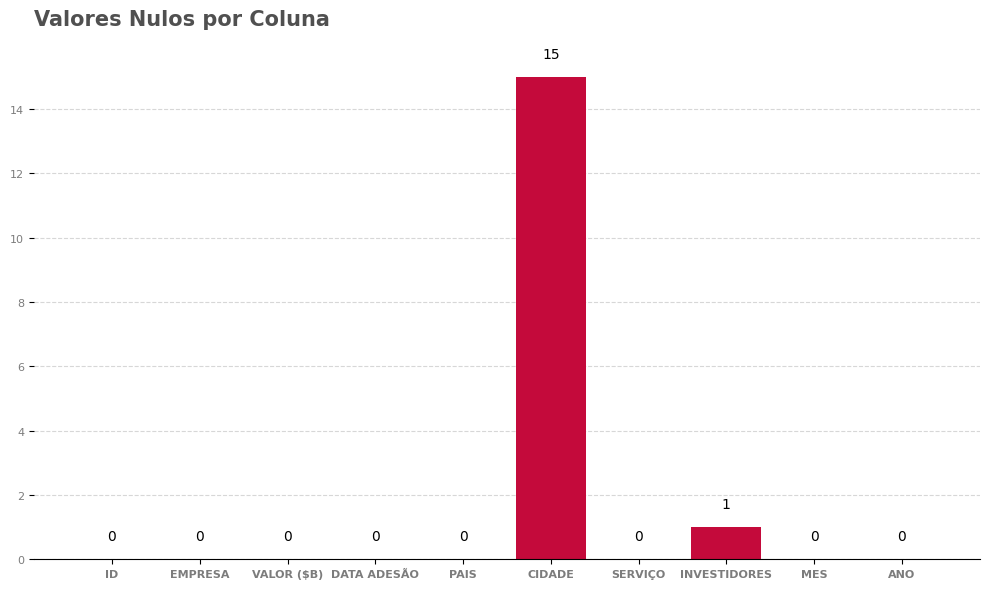

In [228]:
# tamanho do grafico

plt.figure(
    figsize = (10,6)
    )

# titulo

plt.title(
    'Valores Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )

# rotulos de eixo

plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# barras

plt.bar(
    nulos.index, 
    nulos.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno

# valores nas barras

for p, v in enumerate(nulos.values):
    plt.text(p, v + 0.5,
              str(v), 
              ha="center", 
              va="bottom", 
              fontsize=10)
    
# bordas

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



Utilizando a biblioteca `matplotlib` criamos a visualização de um gráfico de barras, representando a quantidade de valores `null` para cada coluna da tabela. Notamos então que as colunas `CIDADE` e `INVESTIDORES` tem **15** e **1** valores nulos respectivamente. 

Com isso é podemos analisar um possível impacto da falta desses valores para análises posteriores, mas nem sempre os gráficos representam a importância de um valor corretamente se não for utilizado de maneira certa.

In [229]:
total_linhas = len(data_base)

percentual = (nulos / total_linhas) * 100

percentual

ID              0.000000
EMPRESA         0.000000
VALOR ($B)      0.000000
DATA ADESÃO     0.000000
PAIS            0.000000
CIDADE          1.602564
SERVIÇO         0.000000
INVESTIDORES    0.106838
MES             0.000000
ANO             0.000000
dtype: float64

Após a transformação da quantidade de `null` por colunas para o percentual de `null` por colunas temos uma noção melhor da falta desses campos. 

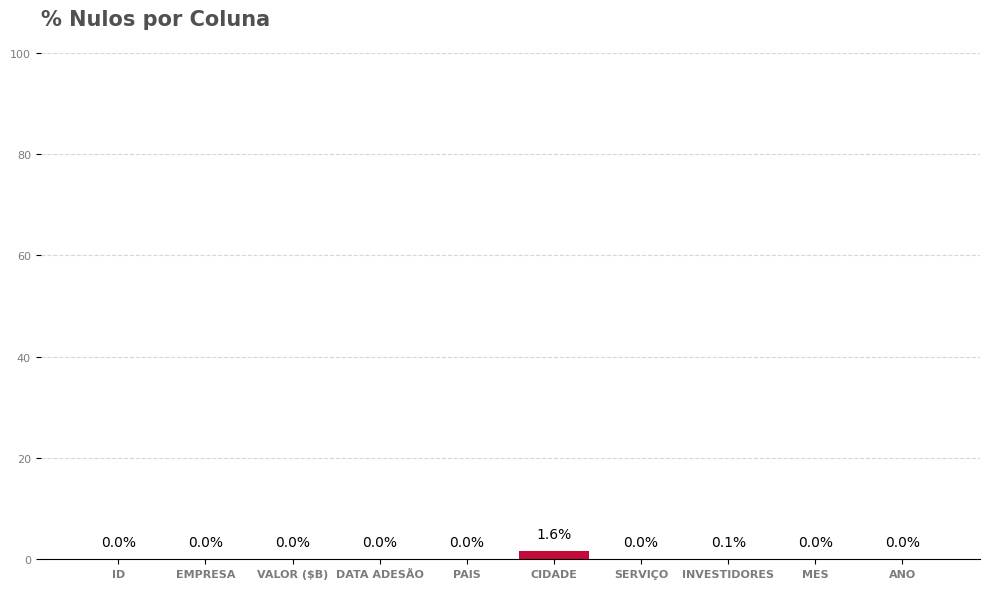

In [230]:
# tamanho do grafico

plt.figure(
    figsize = (10,6)
    )

# titulo

plt.title(
    '% Nulos por Coluna', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )

# eixos

plt.ylim(0, 100)
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# barras

plt.bar(
    percentual.index, 
    percentual.values, 
    color = "#C40A3B", 
    zorder = 2
    ); # ";" retira a mensagem de retorno

# valores das colunas 

for p, v in enumerate(percentual.values):
    plt.text(
            p,
            v + 2,  
            f"{v:.1f}%", 
            ha="center", 
            va="bottom", 
            fontsize=10)

# bordas

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



Para visualização final dos valores nulos, ainda utilizando os gráficos de barras pela biblioteca `matplotlib` é possivel ter a real noção do impacto que a falta de informações pode ter para cada coluna, com a porcentagem de `CIDADE` em **1.6%** e `INVESTIDORES` em **0.1%**.

Visando ter o mínimo possível de impacto da falta desses valores devemos nos perguntar da utilidade dessas colunas para a análise, faremos alguma tabela relacionada a elas? Alguma visualização desses dados? Irá nos auxiliar em para outros fins? 

Na situação atual não serão relevantes mas devemos sempre manter consistência das informações.

## 4.2 Setores Unicórnios

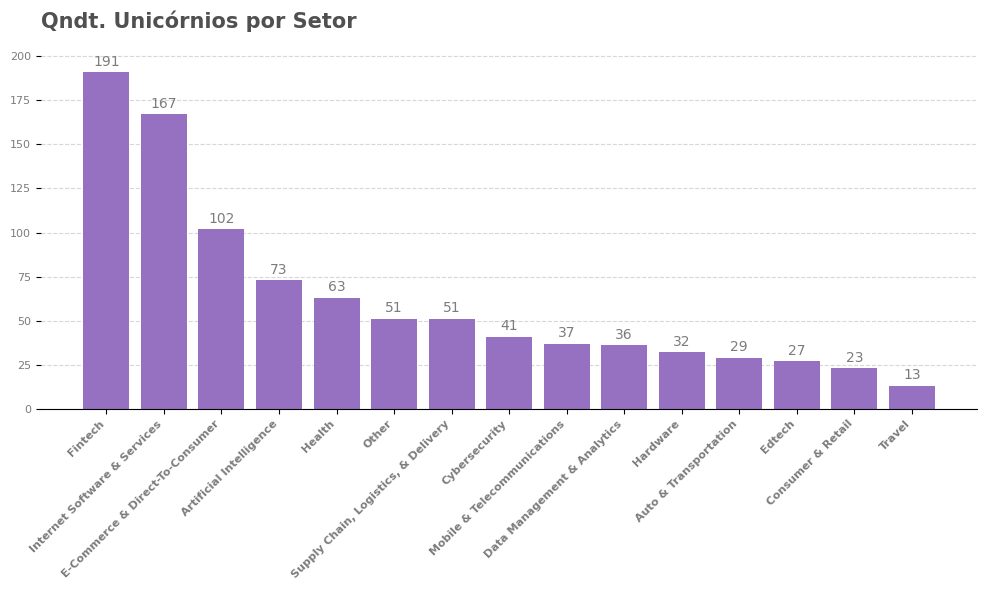

In [284]:
# tamanho do grafico

plt.figure(
    figsize = (10,6)
    )

# titulo

plt.title(
    'Qndt. Unicórnios por Setor', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )

# eixos

plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    rotation=45,
    ha='right',
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# barras

plt.bar(
    data_base['SERVIÇO'].value_counts().index,
    data_base['SERVIÇO'].value_counts().values,
    color = "#9671C2", 
    zorder = 2
    ); # ";" retira a mensagem de retorno

# valores das colunas 

for p, v in enumerate(data_base['SERVIÇO'].value_counts()):
    plt.text(p, v + 2,
              str(v), 
              ha="center", 
              va="bottom",
              color='#7C7C7C',
              fontsize=10)

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()



In [248]:
# constroi porcentagem

porcentagem_setor = round(data_base['SERVIÇO'].value_counts(normalize=True) * 100, 1)

# retorna os top 3 setores + %

top3_setor = porcentagem_setor.sort_values(ascending=False)[:3]

# retorna a soma dos top 3 em % 
top3_setor.sum()

np.float64(49.1)

In [249]:
# retorna os sub 3 setores + %
sub3_setor = porcentagem_setor.sort_values(ascending=True)[:3]

# retorna a soma dos sub 3 em %
sub3_setor.sum()

np.float64(6.8)

Nossos Top 3 setores são: 
1. **Fintech**
2. **Internet software & services**
3. **E-commerce & direct-to-consumer** 

Os três carregam mais de **49%** da indústria de unicórnios sozinhos, já nossos Sub 3 setores (Travel, Consumer & retail e Edtech) não carregam nem **7%** das empresas unicórnios.

## 4.3 Países

In [234]:
# constroi porcentagem

porcentagem_pais = (data_base['PAIS'].value_counts(normalize=True) * 100).round(1)

# ranking 

ranking = porcentagem_pais.sort_values(ascending=False)

# retorna os top 3 paises

top3_pais = ranking[:3]

# soma o restante

outros_pais = ranking[3:].sum()

# cria nova serie

pie_pais = top3_pais.copy()

pie_pais['Outros'] = outros_pais

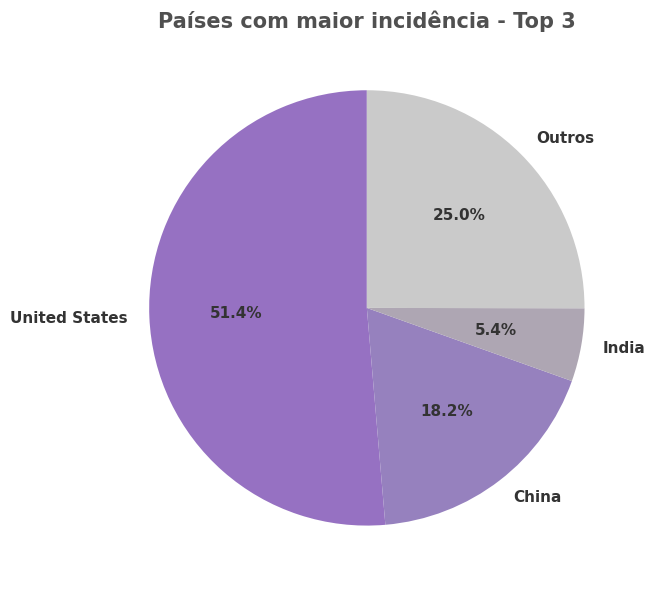

In [235]:
# tamanho do grafico

plt.figure(
    figsize=(10,6)
)

#titulo

plt.title(
    'Países com maior incidência - Top 3', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )

# pizza
plt.pie(
    pie_pais,
    labels=pie_pais.index,
    startangle=90,
    autopct='%1.1f%%',
    colors=[
         "#9671C2",
         "#9681BE",  
         "#AEA6B3",   
         "#CACACA" 
    ],
    textprops={
        'fontsize': 11,
        'fontweight': 'bold',
        'color': '#333333'
    }
);

plt.tight_layout()

Com o gráfico de pizza notamos que os **Estados Unidos** obtem **51.3%** de todas as empresas unicórnios, enquanto todos os outros 46 paises **49.7% global**.

Mas aonde fica o Brasil nisso?

In [236]:
# tabela empresas por pais - top 10

# resetando 

ranking_df = ranking.reset_index()

# nomeando colunas

ranking_df.columns = ['PAIS', '%']

# cria tabela com quantidade de empresas

qnt_emp = data_base['PAIS'].value_counts().reset_index()
qnt_emp.columns = ['PAIS', 'QNTD EMPRESAS']

# juntar usando PAIS como chave

ranking_df = ranking_df.merge(qnt_emp, on='PAIS', how='left')

# cria coluna posição baseada no index 

ranking_df['POSIÇÃO'] = ranking_df.index + 1

# top 10 paises

ranking_df[:10]

,PAIS,%,QNTD EMPRESAS,POSIÇÃO
0,United States,51.1,478,1
1,China,18.1,169,2
2,India,5.4,51,3
3,United Kingdom,4.0,37,4
4,Germany,2.5,23,5
5,Israel,2.2,21,6
6,France,2.0,19,7
7,Canada,1.6,15,8
8,Brazil,1.6,15,9
9,Singapore,1.2,11,10


Após produzirmos um ranking dos países com base na porcentagem de empresas unicórnios total, podemos ver que o Brasil está entre os Top 10, ocupando o 9º lugar com **1.6%** do mercado global de unicórnios em 2021 com **15** empresas.
E caso ele não estivesse no nosso top 10? Simples, utilizariamos 
~~~~python 
ranking_df[ranking_df['PAIS'] == 'Brazil']
~~~~
para retornar o nome, porcentagem, quantidade de empresas e posição.

In [237]:
# tabela empresas do brasil 

#criando tabela

tabela_empresas = data_base.groupby( by =[
    'PAIS',
    'ANO',
    'EMPRESA',
    'SERVIÇO'
    ]).count()['ID'].reset_index()

# retorna tudo que contenha o pais brasil
tabela_empresas.loc[
    tabela_empresas['PAIS'] == 'Brazil'
]

,PAIS,ANO,EMPRESA,SERVIÇO,ID
12,Brazil,2018,Ifood,"Supply Chain, Logistics, & Delivery",1
13,Brazil,2018,Movile,Mobile & Telecommunications,1
14,Brazil,2018,Nubank,Fintech,1
15,Brazil,2019,Ebanx,Fintech,1
16,Brazil,2019,Loggi,"Supply Chain, Logistics, & Delivery",1
17,Brazil,2019,Quintoandar,E-Commerce & Direct-To-Consumer,1
18,Brazil,2019,Wildlife Studios,Other,1
19,Brazil,2020,C6 Bank,Fintech,1
20,Brazil,2020,Creditas,Fintech,1
21,Brazil,2020,Loft,E-Commerce & Direct-To-Consumer,1


Nesta tabela temos todas as 15 empresas unicórnios brasileiras com seus anos a entrarem nesse mercado e o tipo de serviço oferecido.

## 4.4 Valores de mercado

In [238]:
# tabela de valores top 10

# criando tabela

tabela_valores_pais = data_base.groupby(['PAIS'])['VALOR ($B)'].sum().reset_index().sort_values('VALOR ($B)', ascending=False)

# top 10 paises 

tabela_valores_pais[:10]


,PAIS,VALOR ($B)
43,United States,1605.03
8,China,569.48
42,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
37,Sweden,58.08
1,Australia,50.60
21,Israel,43.82
17,Hong Kong,41.45


Sobre valor de mercado por páis é possível perceber no top 10 que nosso 3º é ocupado pelo **Reino Unido**, ele apresenta maior valor de mercado tendo **$150** bilhôes de dólares, porém tem menor quantidade de empresas unicórnios que a India, que é nosso 3º lugar na tabela de países com maior indicência. Se repararmos no **Brasil** notamos semelhança com o Reino Unido, o país também tem maior valor de mercado (com **$61** bilhões de dólares) do que quantidade de empresas unicórnios, subindo dois lugares em relação a mesma tabela. 

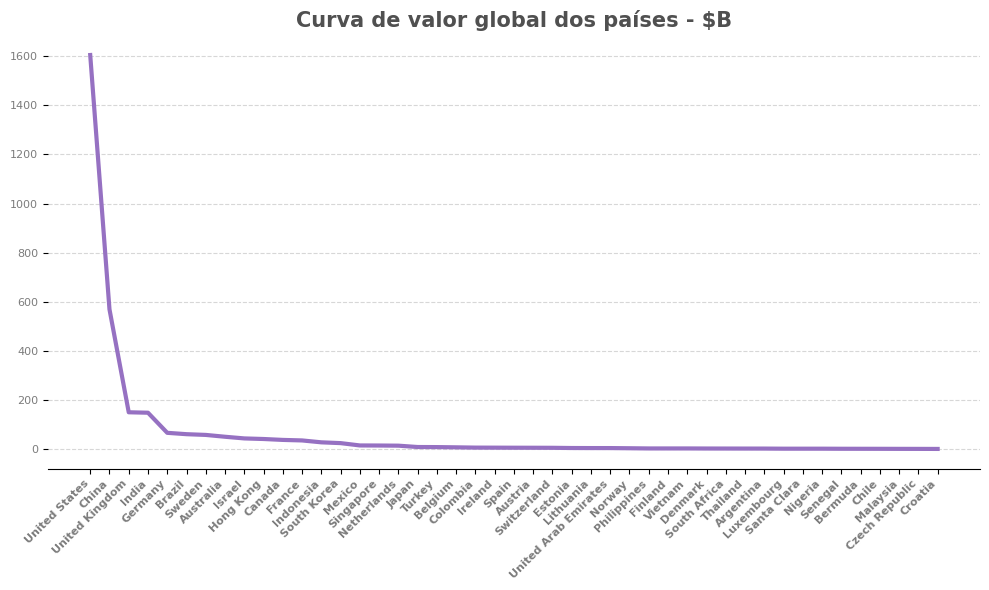

In [239]:
# tamanho do grafico

plt.figure(
    figsize=(10,6)
)

# titulo

plt.title(
    'Curva de valor global dos países - $B', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )

# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    rotation=45,
    ha='right',
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# linha
plt.plot(
    tabela_valores_pais['PAIS'], 
    tabela_valores_pais['VALOR ($B)'],
    color = "#9671C2", 
    linewidth = 3,
    zorder = 2
    );

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

In [240]:
# tabela valores do setor

#criando tabela

tabela_valores_setor = data_base.groupby(['SERVIÇO'])['VALOR ($B)'].sum().reset_index().sort_values('VALOR ($B)', ascending=False)

#top 10 setores

tabela_valores_setor[:10]

,SERVIÇO,VALOR ($B)
7,Fintech,744.13
10,Internet Software & Services,483.76
0,Artificial Intelligence,312.84
5,E-Commerce & Direct-To-Consumer,291.10
12,Other,245.46
9,Health,166.26
13,"Supply Chain, Logistics, & Delivery",146.29
4,Data Management & Analytics,121.70
3,Cybersecurity,107.54
8,Hardware,98.59


In [241]:
data_base['VALOR ($B)'].sum()

np.float64(3071.16)

Em 2021 o valor de mercado total das empresas unicórnios globais é de **$3.071** trilhões de doláres, sendo dominado pelas **Fintechs** carregando **$734** bilhões de dólares sendo proporcional com o primeiro lugar em relação a quantidade de Fintechs globais.

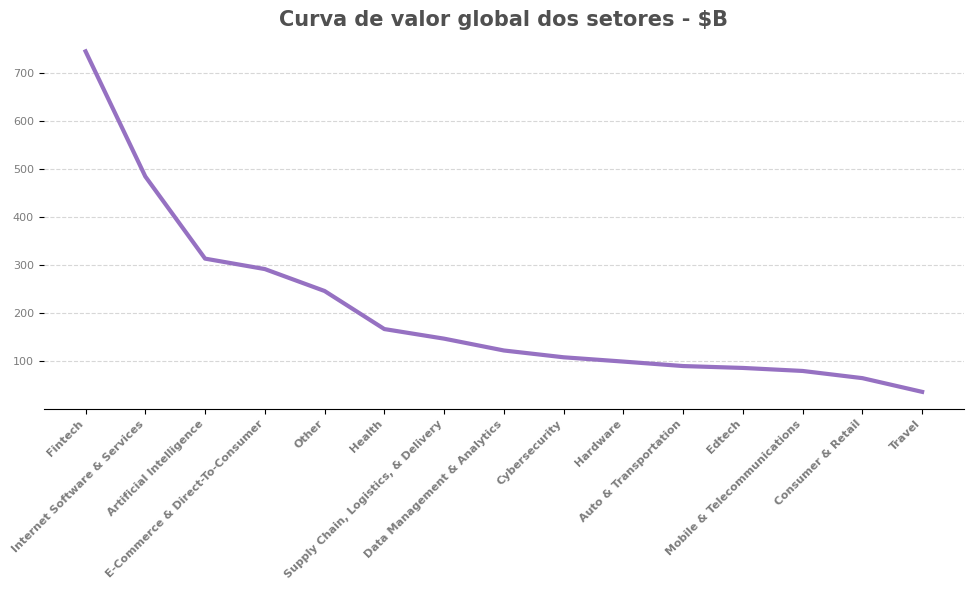

In [242]:
# tamanho do grafico

plt.figure(
    figsize=(10,6)
)

# titulo

plt.title(
    'Curva de valor global dos setores - $B', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )

# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xticks(
    rotation=45,
    ha='right',
    color = '#7C7C7C', 
    fontsize = 8, 
    fontweight = 'bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# linha
plt.plot(
    tabela_valores_setor['SERVIÇO'], 
    tabela_valores_setor['VALOR ($B)'],
    color = "#9671C2", 
    linewidth = 3,
    zorder = 2
    );

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

Podemos comparar esse gráfico ao nosso gráfico anterior "Qntd. Unicórnios por Setor", os dois apresentam muita semelhanças alterando poucas posições e se mantendo consistente. 

In [243]:
# agrupamento por setor e contagem de empresas
tabela_qntd_emp = data_base.groupby(['SERVIÇO'])['EMPRESA'].count().reset_index().sort_values('EMPRESA', ascending=False)    
# renomeia colunas
tabela_qntd_emp.columns = ['SERVIÇO', 'QNTD EMPRESAS']

tabela_qntd_emp

,SERVIÇO,QNTD EMPRESAS
7,Fintech,191
10,Internet Software & Services,167
5,E-Commerce & Direct-To-Consumer,102
0,Artificial Intelligence,73
9,Health,63
12,Other,51
13,"Supply Chain, Logistics, & Delivery",51
3,Cybersecurity,41
11,Mobile & Telecommunications,37
4,Data Management & Analytics,36


In [244]:
# juntando tabelas de valor e quantidade de empresas por setor

tabela_setores = tabela_valores_setor.merge(
    tabela_qntd_emp, 
    on='SERVIÇO',
    how='left'
    )

tabela_setores

,SERVIÇO,VALOR ($B),QNTD EMPRESAS
0,Fintech,744.13,191
1,Internet Software & Services,483.76,167
2,Artificial Intelligence,312.84,73
3,E-Commerce & Direct-To-Consumer,291.10,102
4,Other,245.46,51
5,Health,166.26,63
6,"Supply Chain, Logistics, & Delivery",146.29,51
7,Data Management & Analytics,121.70,36
8,Cybersecurity,107.54,41
9,Hardware,98.59,32


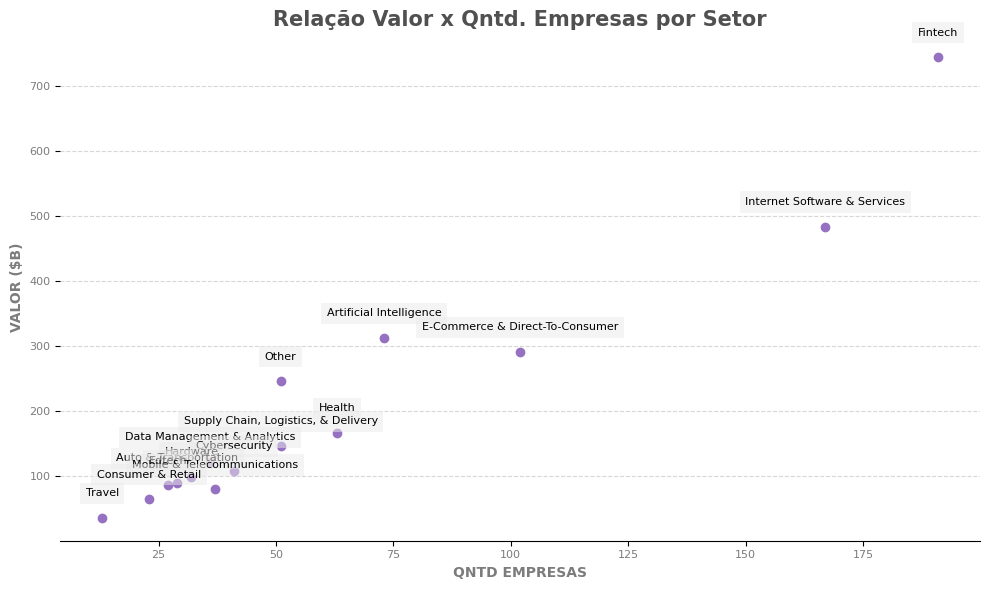

In [245]:
# tamanho do grafico

plt.figure(
    figsize=(10,6)
)

# titulo

plt.title(
    'Relação Valor x Qntd. Empresas por Setor', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )

# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.ylabel(
    'VALOR ($B)', 
    fontsize=10, 
    color='#7C7C7C', 
    fontweight='bold'
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8,
    )
plt.xlabel(
    'QNTD EMPRESAS', 
    fontsize=10, 
    color='#7C7C7C', 
    fontweight='bold'
    )
# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# linha
plt.scatter(
    tabela_setores['QNTD EMPRESAS'], 
    tabela_setores['VALOR ($B)'],
    color = "#9671C2",
    zorder = 2
    );

# nomes dos setores nos pontos

for i in range(tabela_setores.shape[0]):
    plt.text(
        tabela_setores['QNTD EMPRESAS'].iloc[i],
        tabela_setores['VALOR ($B)'].iloc[i] + 30,
        tabela_setores['SERVIÇO'].iloc[i],
        ha = 'center',
        va = 'bottom',
        bbox=dict(facecolor="#EBEBEB", alpha=0.5, edgecolor='none'),
        fontsize=8
    )
# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

Com o gráfico de dispersão é mais perceptível a relação entre a quantidade de empresas de cada setor com seu valor global total, podemos dar destaque por exemplo para o setor `Other` ($B 245.46) que apresenta a mesma quantidade de empresas que o setor `Supply Chain, Logistics, & Delivery` ($B 146.29) ou seja, **51** mas uma diferença significativa de valor de mercado, cerca de **$99** bilhões de dólares.

É possível confirmar isso com:


In [246]:
# retorna apenas os setores com 51 empresas

tabela_setores.loc[
    tabela_setores['QNTD EMPRESAS'] == 51,
    'VALOR ($B)' # retorna apenas a coluna VALOR ($B)
]

4    245.46
6    146.29
Name: VALOR ($B), dtype: float64

In [247]:
245.46 - 146.29

99.17000000000002

## 4.5 Ano

In [ ]:
# tabela de empresas por ano e valor

tabela_ano = data_base.groupby( by =[
    'ANO',
    'EMPRESA',
    'VALOR ($B)'
    ]).count()['ID'].reset_index()

tabela_ano.head()

,ANO,EMPRESA,VALOR ($B),ID
0,2007,Veepee,1.38,1
1,2010,Vancl,3.00,1
2,2011,Klarna,45.60,1
3,2011,Vice Media,5.70,1
4,2012,Avant,2.00,1


In [ ]:
# quantidade de empresas por ano

qntd_empresas_ano = tabela_ano.groupby('ANO')['EMPRESA'].count().reset_index()

qntd_empresas_ano

,ANO,EMPRESA
0,2007,1
1,2010,1
2,2011,2
3,2012,4
4,2013,3
5,2014,13
6,2015,37
7,2016,22
8,2017,46
9,2018,107


In [ ]:
valor_ano = tabela_ano.groupby('ANO')['VALOR ($B)'].sum().reset_index()
valor_ano

,ANO,VALOR ($B)
0,2007,1.38
1,2010,3.00
2,2011,51.30
3,2012,122.30
4,2013,4.30
5,2014,165.38
6,2015,99.55
7,2016,81.04
8,2017,296.14
9,2018,495.47


In [287]:
tabela_ano = qntd_empresas_ano.merge(
    valor_ano,
    on='ANO',
    how='left'
    )

tabela_ano

,ANO,EMPRESA,VALOR ($B)
0,2007,1,1.38
1,2010,1,3.00
2,2011,2,51.30
3,2012,4,122.30
4,2013,3,4.30
5,2014,13,165.38
6,2015,37,99.55
7,2016,22,81.04
8,2017,46,296.14
9,2018,107,495.47


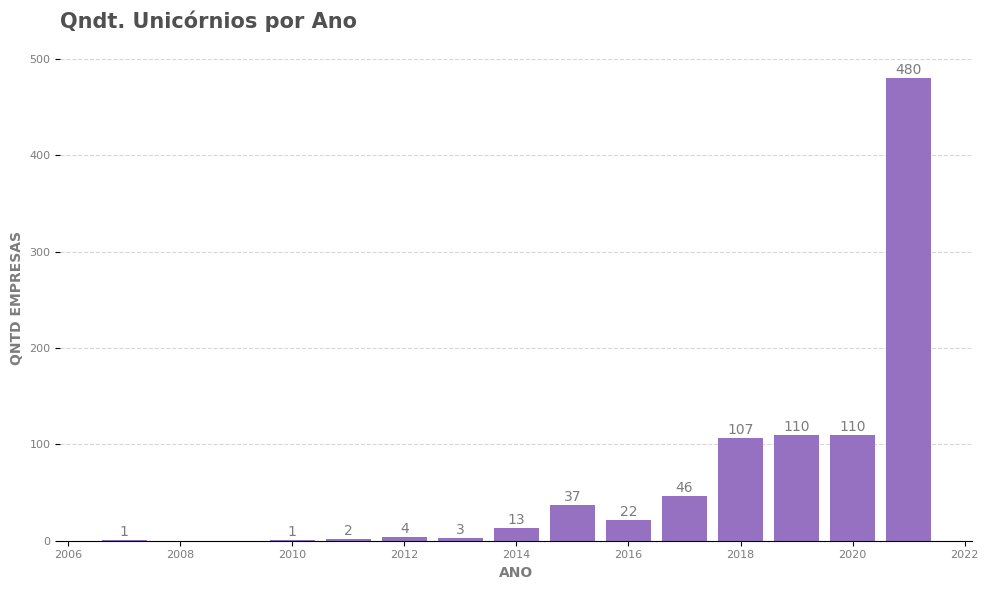

In [288]:
# tamanho do grafico

plt.figure(
    figsize = (10,6)
    )

# titulo

plt.title(
    'Qndt. Unicórnios por Ano', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'left',
    pad= 20
    )

# eixos

plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.ylabel(
    'QNTD EMPRESAS',
    fontsize=10, 
    color='#7C7C7C',
    fontweight='bold'
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.xlabel(
    'ANO', 
    fontsize=10, 
    color='#7C7C7C', 
    fontweight='bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# barras

plt.bar(
    tabela_ano['ANO'],
    tabela_ano['EMPRESA'],
    color = "#9671C2", 
    zorder = 2
    ); # ";" retira a mensagem de retorno

# valores nas barras

for ano, v in zip(tabela_ano['ANO'], tabela_ano['EMPRESA']):
    plt.text(
        ano,
        v + 1,
        str(v),
        ha="center",
        va="bottom",
        color='#7C7C7C',
        fontsize=10
    )


# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

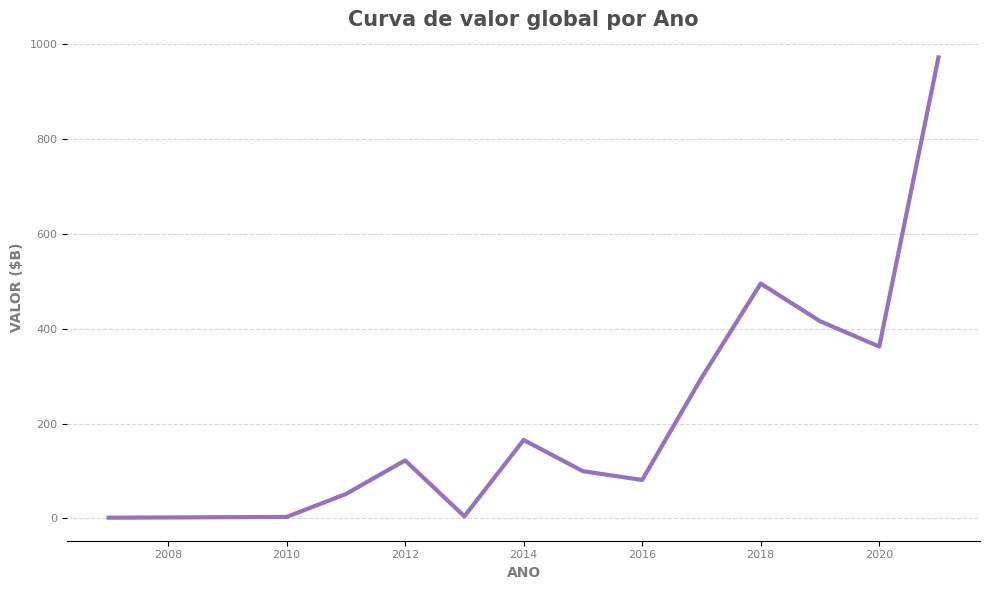

In [289]:
# tamanho do grafico

plt.figure(
    figsize=(10,6)
)

# titulo

plt.title(
    'Curva de valor global por Ano', 
    fontsize = 15, 
    fontweight = 'bold',
    color = "#505050",
    loc= 'center',
    )

# eixos
plt.yticks(
    color = '#7C7C7C', 
    fontsize = 8
    )
plt.ylabel(
    'VALOR ($B)',
    fontsize=10,
    color='#7C7C7C',
    fontweight='bold'
    )
plt.xticks(
    color = '#7C7C7C', 
    fontsize = 8, 
    )
plt.xlabel(
    'ANO', 
    fontsize=10, 
    color='#7C7C7C', 
    fontweight='bold'
    )

# grid

plt.grid(
    axis='y', 
    linestyle = '--', 
    alpha = 0.5, 
    zorder = 0
    )

# linha
plt.plot(
    tabela_ano['ANO'], 
    tabela_ano['VALOR ($B)'],
    color = "#9671C2", 
    linewidth = 3,
    zorder = 2
    );

# bordas
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()